# PROJECT - Zomato API 2

## 2. User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

### 2.1 Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
1. Number of Votes given Restaurant
2. Restaurant serving more number of cuisines.
3. Average Cost of Restaurant
4. Restaurant serving some specific cuisines.

#### In the following cell, I have
1. Imported the required libraries which are : numpy,pandas and matplotlib.pyplot

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

#### 2.1.1 Rating vs Number of votes

#### In the following cell, I have
1. Initialied the dataframe with the zomato csv file provided
2. Copied it to a new dataframe(df)
3. Retained only those restaurants which are in India with the help of country code(for India, country code is 1)
4. Plotted a scatter graph between aggregate rating and number of votes.

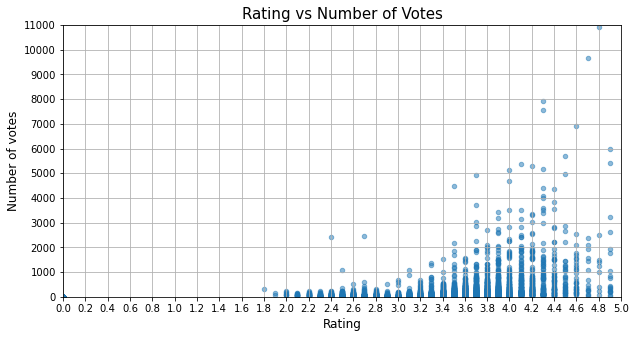

In [3]:
dataframe = pd.read_csv("zomato.csv", encoding="ISO-8859-1")
df = dataframe.copy()
df = df[df["Country Code"] == 1]

plt.figure(figsize=(10, 5))
plt.scatter(df['Aggregate rating'], df['Votes'], s=20, alpha=0.5)
plt.yticks(np.arange(0, 12000, 1000))
plt.xticks(np.arange(0,5.5,0.2))
plt.axis([0, 5, 0, 11000])
plt.xlabel('Rating', size=12)
plt.ylabel('Number of votes', size=12)
plt.title('Rating vs Number of Votes',size=15)
plt.grid()
plt.show()

#### Analysis
Clearly as the number of votes increases the chances of getting higher ratings also increases. It is clear from the
graph that any restaurants with more than 5000 votes get ratings between 4 and 5. when the voes are less than
2000, there is a diversity of ratings, which varies from 2 to 5. so for a restaurant to have a probability of getting
higher aggregate rating, it should have more than 5000 votes. Also there are many restaurants having votes
between between 1000 and 2000 with very good ratings, that is between 4 and 5.

#### 2.1.2 Rating vs Number of cuisines

#### In the following cell, I have
1. Retained only those data which have a value in Cuisines column and removed rows which have null values
2. Counted cuisines in each row with the help of split(",") functon and stored it in an array
3. Stored rating of all the rows in an array
4. Passed both these arrays to a scatter plot

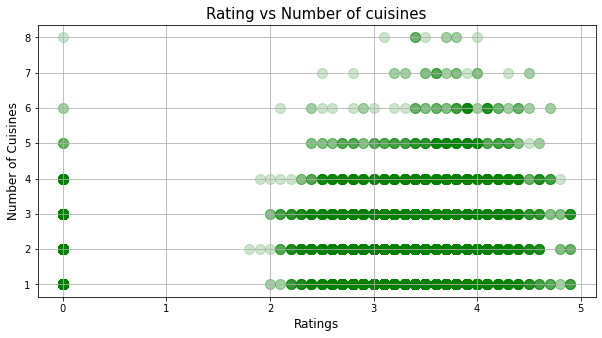

In [5]:
df = df.loc[df.Cuisines.notnull()]
cuisineCount = [len(i.split(",")) for i in df.Cuisines]
rating = [i for i in df["Aggregate rating"]]

plt.figure(figsize=(10, 5))
plt.scatter(rating, cuisineCount, c='green', s=100, alpha=.2)
plt.xlabel('Ratings',size=12)
plt.ylabel('Number of Cuisines',size=12)
plt.title("Rating vs Number of cuisines", size=15)
plt.grid()
plt.show()


#### Analysis
From the graph itself, it is clear that when the number of cuisines provided increases from 3 to 8, generally the
rating seems to converge between 3 and 4. restaurants providing more number of cuisines are not much likely
to get higher ratings, specially when the number of cuisines provided exceeds 6. And if the restaurants provide
less number of cuisines, for example 1 or 2 cuisines, they are more likely to get higher ratings. Infact many
restaurants in india are providing 2 cuisines. there is a very less number of restaurants providing 8 cuisines. It
seems like when a restaurant provides too many cuisines, its focus on the quality of food offered decreases. While
restaurants providing less cuisines focus on the quality of food to get good aggregate ratings.

#### 2.1.3 Rating vs Average cost of restaurant

#### In the following cell, I have
1. Plotted a scatter graph with the help of aggregate rating and avg cost for two taken directly from the Dataframe

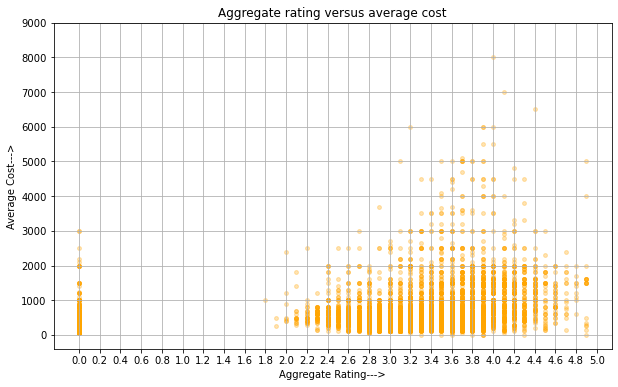

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Aggregate rating'], df['Average Cost for two'], s=15, c='orange', alpha=.3)
plt.grid()
plt.yticks(np.arange(0, 10000, 1000))
plt.xticks(np.arange(0,5.2,0.2))
plt.xlabel('Aggregate Rating--->')
plt.ylabel('Average Cost--->')
plt.title('Aggregate rating versus average cost')
plt.show()

#### Analysis
From the above plot, we can see that when the average cost goes higher than Rs. 3000 the rating is generally
between 3 and 4.5, and ofcourse it should be like that only, because when the average cost is too high, the
food quality should also be high. When average cost is below Rs.1000, we can see the rating varying between 2 and 4.5. This shows that price should not be necessarily high for having a nice tasty meal. And yet there are some restaurants offering poor meal for high price.

#### 2.1.4 Rating vs Restaurants serving some specific cuisines

#### In the following cell, I have
1. Itreated over the cuisines column of the dataframe, added each cuisine in a row to a list(cuisinesList) by splitting and striping them
2. Added to a dictionary(dictcuisineCount) each distinct cuisine and its count by iterating over the above cuisineList(cuisinesList)
3. Created two numpy arrays, for all the keys and values in the dictionary
4. Sorted both the arrays(cuisinesfromdict, timesCuisinesfromdict) in descending order based on list of values
5. Copied to two new arrays only the top ten keys and values from previous arrays(cuisinesfromdict, timesCuisinesfromdict)
6. Printed those 10 keys and values from arrays(popcuisinesfromdict, poptimesCuisinesfromdict)
7. Plotted a pie chart using arrays(popcuisinesfromdict as labels, poptimesCuisinesfromdict as values)

Top 10 most Popular Cuisines
-----------------------------
North Indian : 3960
Chinese : 2735
Fast Food : 1986
Mughlai : 995
Italian : 764
Bakery : 745
Continental : 736
Cafe : 703
Desserts : 653
South Indian : 636


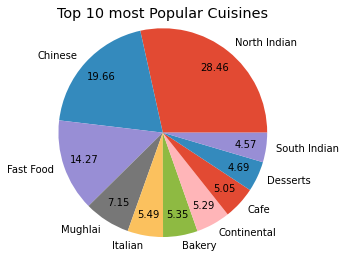

In [19]:
cuisinesList = []
df = dataframe.copy()
for row in df.Cuisines:
    row = str(row)
    for cui in row.split(","):
        cuisinesList.append(cui.strip())

dictcuisineCount = dict()
for cui in cuisinesList:
    if cui in dictcuisineCount.keys():
        dictcuisineCount[cui] += 1
    else:
        dictcuisineCount[cui] = 1

cuisinesfromdict = np.array([i for i in dictcuisineCount.keys()])
timesCuisinesfromdict = np.array([i for i in dictcuisineCount.values()])

cuisinesfromdict = cuisinesfromdict[np.argsort(timesCuisinesfromdict)][::-1]
timesCuisinesfromdict = timesCuisinesfromdict[np.argsort(timesCuisinesfromdict)][::-1]

popcuisinesfromdict = cuisinesfromdict[0:10]
poptimesCuisinesfromdict = timesCuisinesfromdict[0:10]

print("Top 10 most Popular Cuisines")
print("-----------------------------")
for i in range(10):
    print(popcuisinesfromdict[i],":",poptimesCuisinesfromdict[i])

plt.pie(poptimesCuisinesfromdict,labels=popcuisinesfromdict, radius=1.2,autopct="%.2f",pctdistance=.8)
plt.style.use("ggplot")
plt.title("Top 10 most Popular Cuisines")
plt.show()



#### In the following cell, I have 
1.Plotted a histogram for the top 10 cuisines 

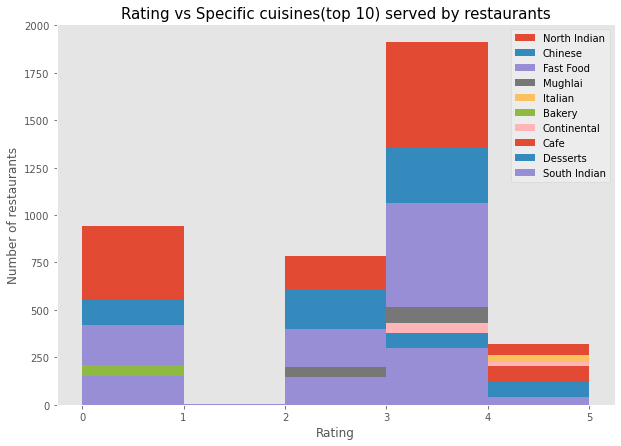

In [8]:
plt.figure(figsize=(10, 7))
for i in popcuisinesfromdict:
    rating=[]
    for cui, k in zip(df.Cuisines, df['Aggregate rating']):
        cui=str(cui) 
        if i in cui:
            rating.append(k)
    plt.hist(rating, bins=[0, 1, 2, 3, 4, 5])
    plt.style.use("bmh")
plt.xlabel('Rating',size=12)
plt.ylabel('Number of restaurants',size=12)
plt.title('Rating vs Specific cuisines(top 10) served by restaurants',size=15)
plt.grid()
plt.legend(labels=popcuisinesfromdict)
plt.show()


#### In the following cell, I have 
1.Plotted a histogram for each of the top 10 cuisines 

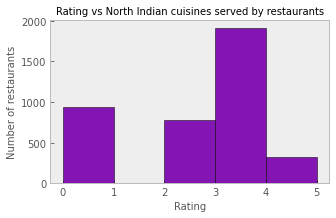

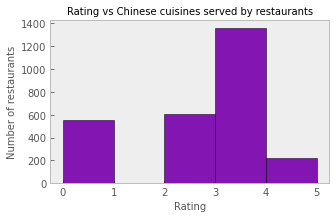

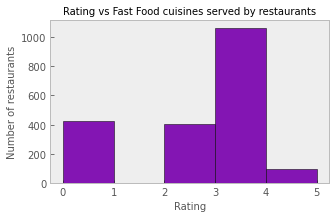

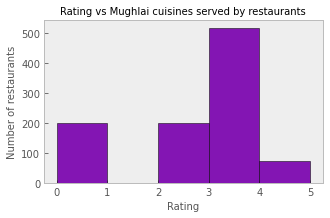

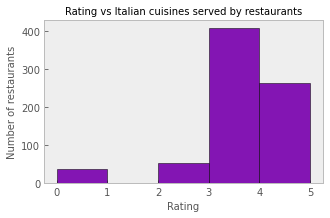

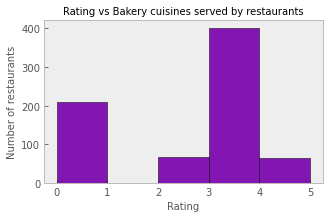

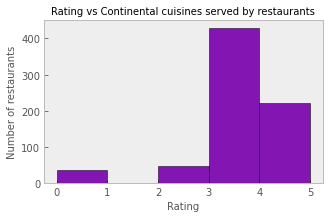

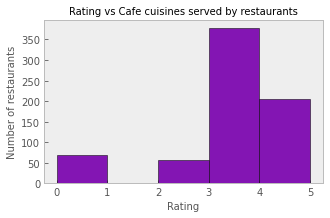

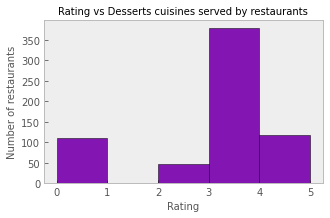

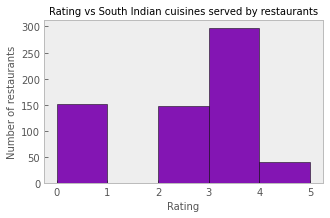

In [9]:

for i in popcuisinesfromdict:
    rating=[]
    for cui, k in zip(df.Cuisines, df['Aggregate rating']):
        cui=str(cui) 
        if i in cui:
            rating.append(k)
    plt.figure(figsize=(5, 3))
    plt.hist(rating, edgecolor='black',color="#8315b3", bins=[0, 1, 2, 3, 4, 5])
    plt.xlabel('Rating',size=10)
    plt.ylabel('Number of restaurants',size=10)
    
    plt.title(f'Rating vs {i} cuisines served by restaurants',size=10)
    plt.grid()
    #plt.legend(labels = i)
    plt.show()


#### Analysis
From the above histrogram plots, it is clear that North indian cuisinie is the best rated among all the cuisinies in
all the aggregate ranges. After it comes the chinese cuisinie, it is rated between 3 to 4 maximum number of
times. Then we have Fast Food, which has been rated between 3 to 4 stars maximum number of times. After
these comes mughlai and italian cuisines.it seems like people like the italian cuisinie very much because it has a
considerable rating between 3 to 4 and 4 to 5 also.

### 2.2. Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
Weighted Restaurant Rating = Σ (number of votes * rating) / Σ (number of votes) .

#### In the following cell, I have 
1. Copied the original dataframe to df, retained only those rows where country is India(customercode is 1)
2. Dropped columns from df which are not required for the analysis
3. Dropped rows which have either of the following columns as null value. The columns considered are Votes, Locality, Aggregate Rating and Restaurant name
4. Created a new column(VotesRatingProduct) which is the product of votes and Aggregate Rating
5. Grouped by Locality and found out the sum of column(VotesRatingProduct) and stored into a dataframe(dfSUMVotesRatingProduct)
6. Grouped by Locality and found out the sum of column(Votes) and stored into a dataframe(dfSUMVotes)
7. Merged the dataframes(dfSUMVotesRatingProduct, dfSUMVotes) on Locality and stored it as df1
8. Created a new column(weighted) which is the result of SUMVotesRatingProduct/SUMVotes in dataframe(df1)
9. Merged the dataframes(df, df1) on Locality and stored as df2 for referenece purposes
10. Printed first 5 rows of df2 for checking

In [10]:
df = dataframe.copy()
df = df[df["Country Code"] == 1]
df.head(1)
df = df.drop(columns=['Locality Verbose', 'Longitude', 'Latitude','Rating color', 'Rating text','Restaurant ID','Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu','Address',
       'Price range','Country Code' ])
df.dropna(subset=['Votes'],inplace=True)
df.dropna(subset=['Locality'],inplace=True)
df.dropna(subset=['Aggregate rating'],inplace=True)
df.dropna(subset=['Restaurant Name'],inplace=True)
df["VotesRatingProduct"] = round(df["Votes"] * df["Aggregate rating"],2)

dfSUMVotesRatingProduct = df.groupby(['Locality']).VotesRatingProduct.agg('sum').to_frame('SUMVotesRatingProduct').reset_index()
dfSUMVotes = df.groupby(['Locality']).Votes.agg('sum').to_frame('SUMVotes').reset_index()

df1 = pd.merge(dfSUMVotesRatingProduct, dfSUMVotes, on='Locality')
df1["Weighted"] = df1["SUMVotesRatingProduct"] / df1["SUMVotes"]
df2 = pd.merge(df, df1, on='Locality')
df2.head()

Restaurant Name  City     Locality  \
0                             Jahanpanah  Agra   Agra Cantt   
1                    Rangrezz Restaurant  Agra   Agra Cantt   
2                Time2Eat - Mama Chicken  Agra   Agra Cantt   
3  Chokho Jeeman Marwari Jain Bhojanalya  Agra  Civil Lines   
4                         Pinch Of Spice  Agra  Civil Lines   

                         Cuisines  Average Cost for two  Aggregate rating  \
0           North Indian, Mughlai                   850               3.9   
1           North Indian, Mughlai                   700               3.5   
2                    North Indian                   500               3.6   
3                      Rajasthani                   400               4.0   
4  North Indian, Chinese, Mughlai                  1000               4.2   

   Votes  VotesRatingProduct  SUMVotesRatingProduct  SUMVotes  Weighted  
0    140               546.0                 1132.9       305  3.714426  
1     71               248.5                 1132.9       305  3.714426  
2     94               338.4                 1132.9       305  3.714426  
3     87               348.0                14340.1      3811  3.762818  
4    177               743.4                14340.1      3811  3.762818

#### In the following cell, I have
1. Dropped rows which have NaN(not a number) in weighted column of dataframe(df1)
2. Updated weighted column by rounding to two decimal places with the help of apply function
3. Sorted the dataframe df1 with respect to weighted column in descending order and stored into a new dataframe dfFinal


In [20]:
df1.dropna(subset=['Weighted'],inplace=True)
decimals = 2 
df1['Weighted'] = df1['Weighted'].apply(lambda x: round(x, decimals))
dfFinal = df1.sort_values('Weighted',ascending=False)


#### In the following cell, I have
1. Printed the first 10 rows in the dataframe dfFinal with the use of a counter

In [27]:
print("Top 10 localities with most weighted restaurant rating")
print("-------------------------------------------------------")
count = 0
for index, row in dfFinal.iterrows():
    if count<10:
        print(count+1,". ",end=" ")
        print(row.Locality,row.Weighted, sep=" : ")
    count+=1

Top 10 localities with most weighted restaurant rating
-------------------------------------------------------
1 .  Hotel Clarks Amer, Malviya Nagar : 4.9
2 .  Aminabad : 4.9
3 .  Friends Colony : 4.89
4 .  Powai : 4.84
5 .  Kirlampudi Layout : 4.82
6 .  Deccan Gymkhana : 4.8
7 .  Express Avenue Mall,  Royapettah : 4.8
8 .  Banjara Hills : 4.72
9 .  Sector 5, Salt Lake : 4.71
10 .  Riverside Mall, Gomti Nagar : 4.7


#### In the following cell, I have
1. Printed all the rows in the dataframe df1 

In [26]:
print("Weighted restaurant rating of each locality")
print("--------------------------------------------")
for index, row in df1.iterrows():
    print(row.Locality,row.Weighted, sep=" : ")

Weighted restaurant rating of each locality
--------------------------------------------
 ILD Trade Centre Mall, Sohna Road : 2.82
12th Square Building, Banjara Hills : 4.3
A Hotel, Gurdev Nagar : 3.6
ARSS Mall, Paschim Vihar : 3.1
Aaya Nagar : 0.0
Acropolis Mall, Kasba  : 4.38
Adajan Gam : 3.89
Adchini : 3.64
Aditya Mega Mall, Karkardooma : 3.47
Adyar : 4.2
Aerocity : 3.1
Aggar Nagar : 3.5
Aggarwal City Mall, Pitampura : 2.98
Aggarwal City Plaza, Rohini : 3.12
Agra Cantt : 3.71
Akashwani : 3.6
Alaknanda : 3.5
Alkapuri : 4.22
Ambavadi : 4.2
Ambience Mall, Gurgaon : 4.21
Ambience Mall, Vasant Kunj : 3.45
Aminabad : 4.9
Anand Lok : 4.11
Anand Vihar : 3.48
Anand Wali Goan : 3.65
Anandpuri : 3.5
Andaz Delhi, Aerocity : 3.0
Anil Plaza, Christian Basti : 4.27
Anjuna : 4.54
Anjuna Beach, Anjuna : 3.5
Anna Nagar East : 4.25
Ansal Plaza Mall, Greater Noida : 3.18
Ansal Plaza Mall, Khel Gaon Marg : 3.94
Ansal Plaza Mall, Palam Vihar : 2.71
Arambol : 4.6
Ardee City : 2.53
Arera Colony : 4.39
Arya